# **Analyse des Pokémon**

*  Mini Projet perso réalisé par ANTON NELCON Steve
*   Master 1 Informatique et Big Data - Université Paris 8



**Objectif du  Mini projet**:
Analyser un dataset Pokémon pour comprendre :



→Quels Pokémon sont les plus puissants

→Quels types sont les plus forts en moyenne

→Comparer les générations

→Étudier l’impact des Pokémon légendaires*   Élément de liste



## **Etape 1 : Connaissance de la dataset**

1️⃣ Charger les données en Python

In [15]:
import pandas as pd
from tabulate import tabulate  # pour un affichage joli des DataFrames

# Charger le dataset
df = pd.read_csv("Pokemon.csv")

print("\n" + "="*60)
print("🏆  APERÇU DES DONNÉES  🏆")
print("="*60)
# Affichage joli des 5 premières lignes
print(tabulate(df.head(), headers='keys', tablefmt='grid'))

print("\n" + "="*60)
print("📋  INFORMATIONS SUR LE DATASET  📋")
print("="*60)
# info() n'est pas un DataFrame, donc on laisse print classique
df.info()

print("\n" + "="*60)
print("📊  STATISTIQUES DES COLONNES NUMÉRIQUES  📊")
print("="*60)
# Affichage joli des statistiques
print(tabulate(df.describe(), headers='keys', tablefmt='grid'))




🏆  APERÇU DES DONNÉES  🏆
+----+-----+-----------------------+----------+----------+---------+------+----------+-----------+-----------+-----------+---------+--------------+-------------+
|    |   # | Name                  | Type 1   | Type 2   |   Total |   HP |   Attack |   Defense |   Sp. Atk |   Sp. Def |   Speed |   Generation | Legendary   |
+====+=====+=======================+==========+==========+=========+======+==========+===========+===========+===========+=========+==============+=============+
|  0 |   1 | Bulbasaur             | Grass    | Poison   |     318 |   45 |       49 |        49 |        65 |        65 |      45 |            1 | False       |
+----+-----+-----------------------+----------+----------+---------+------+----------+-----------+-----------+-----------+---------+--------------+-------------+
|  1 |   2 | Ivysaur               | Grass    | Poison   |     405 |   60 |       62 |        63 |        80 |        80 |      60 |            1 | False       |
+-

**Analyse 1 : Top 10 Pokémon les plus puissants**

In [17]:
# Top 10 Pokémon les plus puissants
top10 = df.sort_values(by="Total", ascending=False).head(10)

print("\n" + "="*60)
print("🔥 TOP 10 POKÉMON LES PLUS PUISSANTS 🔥")
print("="*60)

# Affichage joli avec tabulate
print(tabulate(top10[["Name", "Total", "Type 1", "Type 2"]], headers='keys', tablefmt='fancy_grid'))




🔥 TOP 10 POKÉMON LES PLUS PUISSANTS 🔥
╒═════╤═════════════════════════╤═════════╤══════════╤══════════╕
│     │ Name                    │   Total │ Type 1   │ Type 2   │
╞═════╪═════════════════════════╪═════════╪══════════╪══════════╡
│ 426 │ RayquazaMega Rayquaza   │     780 │ Dragon   │ Flying   │
├─────┼─────────────────────────┼─────────┼──────────┼──────────┤
│ 163 │ MewtwoMega Mewtwo X     │     780 │ Psychic  │ Fighting │
├─────┼─────────────────────────┼─────────┼──────────┼──────────┤
│ 164 │ MewtwoMega Mewtwo Y     │     780 │ Psychic  │ nan      │
├─────┼─────────────────────────┼─────────┼──────────┼──────────┤
│ 422 │ KyogrePrimal Kyogre     │     770 │ Water    │ nan      │
├─────┼─────────────────────────┼─────────┼──────────┼──────────┤
│ 424 │ GroudonPrimal Groudon   │     770 │ Ground   │ Fire     │
├─────┼─────────────────────────┼─────────┼──────────┼──────────┤
│ 552 │ Arceus                  │     720 │ Normal   │ nan      │
├─────┼─────────────────────────┼────

**Représentation Graphique**

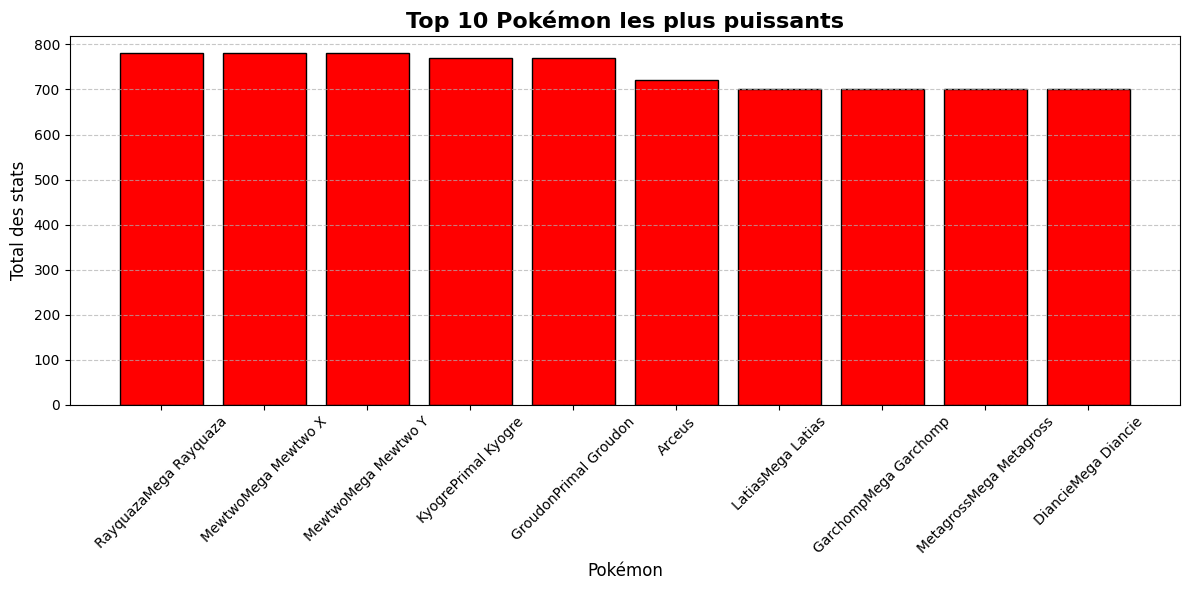

In [18]:
# Graphique
plt.figure(figsize=(12,6))
plt.bar(top10["Name"], top10["Total"], color="red", edgecolor="black")
plt.title("Top 10 Pokémon les plus puissants", fontsize=16, fontweight='bold')
plt.xlabel("Pokémon", fontsize=12)
plt.ylabel("Total des stats", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Analyse 2 : Moyenne des stats par type**


💪 MOYENNE DES STATS PAR TYPE DE POKÉMON 💪
╒══════════╤═══════╤══════════╤═══════════╤═══════════╤═══════════╤═════════╤═════════╕
│ Type 1   │    HP │   Attack │   Defense │   Sp. Atk │   Sp. Def │   Speed │   Total │
╞══════════╪═══════╪══════════╪═══════════╪═══════════╪═══════════╪═════════╪═════════╡
│ Bug      │ 56.88 │    70.97 │     70.72 │     53.87 │     64.80 │   61.68 │  378.93 │
├──────────┼───────┼──────────┼───────────┼───────────┼───────────┼─────────┼─────────┤
│ Dark     │ 66.81 │    88.39 │     70.23 │     74.65 │     69.52 │   76.16 │  445.74 │
├──────────┼───────┼──────────┼───────────┼───────────┼───────────┼─────────┼─────────┤
│ Dragon   │ 83.31 │   112.12 │     86.38 │     96.84 │     88.84 │   83.03 │  550.53 │
├──────────┼───────┼──────────┼───────────┼───────────┼───────────┼─────────┼─────────┤
│ Electric │ 59.80 │    69.09 │     66.30 │     90.02 │     73.70 │   84.50 │  443.41 │
├──────────┼───────┼──────────┼───────────┼───────────┼───────────┼─────────┼

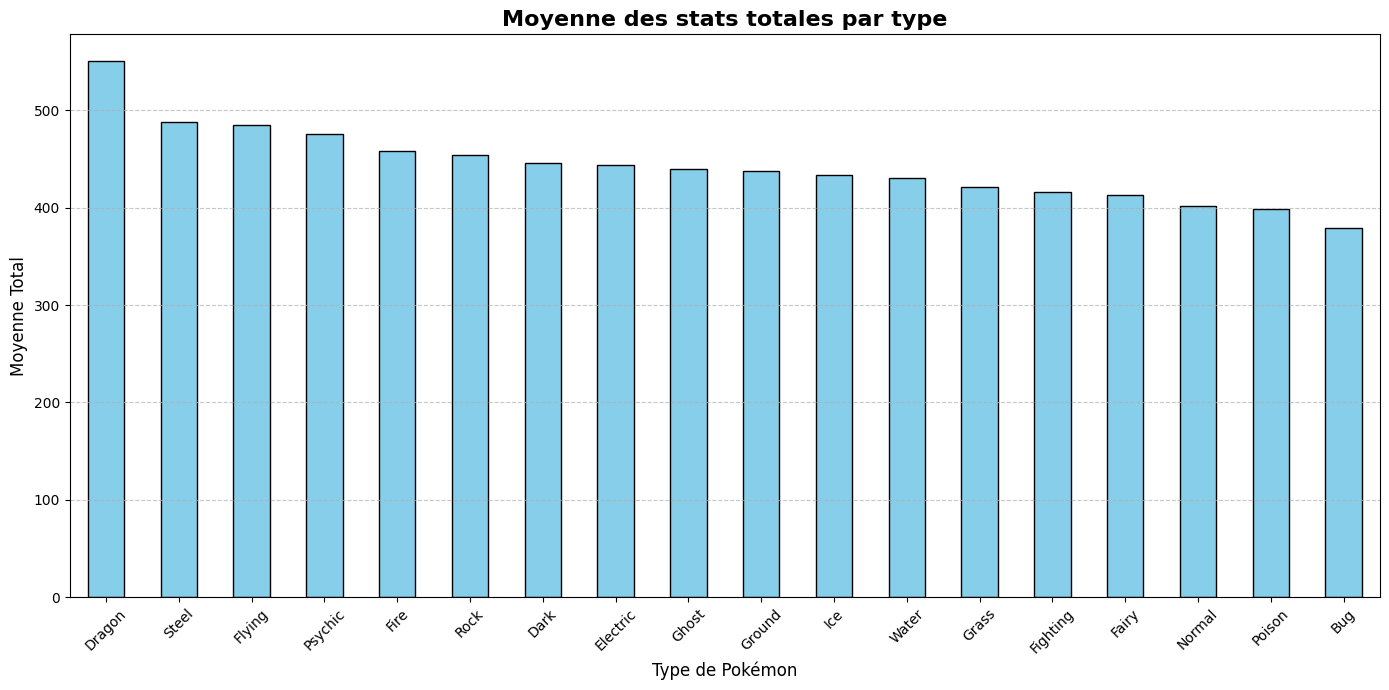

In [19]:

# Moyenne des stats par Type 1
type_stats = df.groupby("Type 1")[["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed","Total"]].mean()

print("\n" + "="*70)
print("💪 MOYENNE DES STATS PAR TYPE DE POKÉMON 💪")
print("="*70)

# Affichage joli avec tabulate
print(tabulate(type_stats, headers='keys', tablefmt='fancy_grid', floatfmt=".2f"))

# Graphique amélioré
plt.figure(figsize=(14,7))
type_stats["Total"].sort_values(ascending=False).plot(
    kind="bar",
    color="skyblue",
    edgecolor="black"
)
plt.title("Moyenne des stats totales par type", fontsize=16, fontweight='bold')
plt.xlabel("Type de Pokémon", fontsize=12)
plt.ylabel("Moyenne Total", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Analyse 3 : Comparaison Génération 1 vs Génération 8**


⚡ COMPARAISON DES STATS : GÉNÉRATION 1 VS GÉNÉRATION 8 ⚡
╒════╤══════════════╤═════════════════╕
│    │   Generation │   Moyenne Total │
╞════╪══════════════╪═════════════════╡
│  0 │         1.00 │          426.81 │
╘════╧══════════════╧═════════════════╛


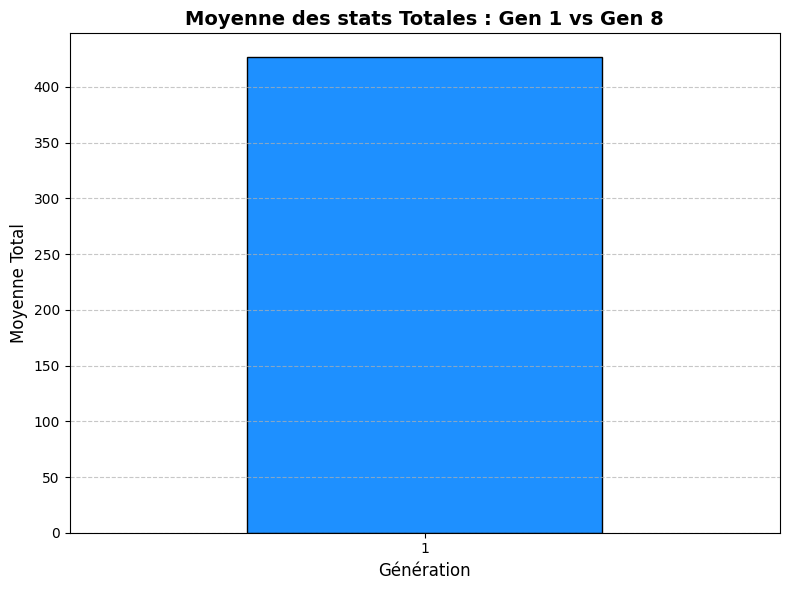

In [20]:
from tabulate import tabulate
import matplotlib.pyplot as plt

# Comparaison Génération 1 vs Génération 8
gen_stats = df[df["Generation"].isin([1,8])].groupby("Generation")["Total"].mean()

print("\n" + "="*70)
print("⚡ COMPARAISON DES STATS : GÉNÉRATION 1 VS GÉNÉRATION 8 ⚡")
print("="*70)

# Affichage joli avec tabulate
print(tabulate(gen_stats.reset_index(), headers=['Generation', 'Moyenne Total'], tablefmt='fancy_grid', floatfmt=".2f"))

# Graphique amélioré
plt.figure(figsize=(8,6))
gen_stats.plot(
    kind="bar",
    color=["dodgerblue", "mediumseagreen"],
    edgecolor="black"
)
plt.title("Moyenne des stats Totales : Gen 1 vs Gen 8", fontsize=14, fontweight='bold')
plt.xlabel("Génération", fontsize=12)
plt.ylabel("Moyenne Total", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Bonus : Pokémon légendaires vs non-légendaires**


⭐ COMPARAISON : LÉGENDAIRES VS NON-LÉGENDAIRES ⭐
╒════╤═════════════╤═════════════════╕
│    │ Legendary   │   Moyenne Total │
╞════╪═════════════╪═════════════════╡
│  0 │ False       │          417.21 │
├────┼─────────────┼─────────────────┤
│  1 │ True        │          637.38 │
╘════╧═════════════╧═════════════════╛


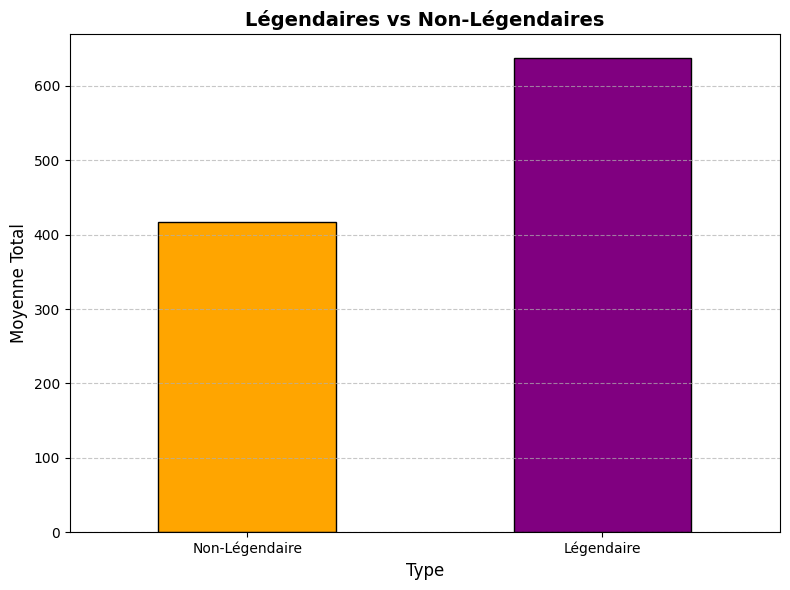

In [21]:
from tabulate import tabulate
import matplotlib.pyplot as plt

# Moyenne des stats : Légendaires vs Non-Légendaires
legend_stats = df.groupby("Legendary")["Total"].mean()

print("\n" + "="*70)
print("⭐ COMPARAISON : LÉGENDAIRES VS NON-LÉGENDAIRES ⭐")
print("="*70)

# Affichage joli avec tabulate
print(tabulate(legend_stats.reset_index(), headers=['Legendary', 'Moyenne Total'], tablefmt='fancy_grid', floatfmt=".2f"))

# Graphique amélioré
plt.figure(figsize=(8,6))
legend_stats.plot(
    kind="bar",
    color=["orange","purple"],
    edgecolor="black"
)
plt.title("Légendaires vs Non-Légendaires", fontsize=14, fontweight='bold')
plt.xlabel("Type", fontsize=12)
plt.ylabel("Moyenne Total", fontsize=12)
plt.xticks([0,1], ["Non-Légendaire", "Légendaire"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **Etape 2 : le Combats**

In [23]:
from tabulate import tabulate
import matplotlib.pyplot as plt

# Top 5 Pokémon les plus puissants
top5 = df.sort_values(by="Total", ascending=False).head(5)
print("\n" + "="*70)
print("🔥 TOP 5 POKÉMON LES PLUS PUISSANTS 🔥")
print("="*70)
print(tabulate(top5[["Name", "Total", "Type 1", "Type 2"]], headers='keys', tablefmt='fancy_grid', floatfmt=".2f"))

# Top 5 Pokémon les plus faibles
bottom5 = df.sort_values(by="Total", ascending=True).head(5)
print("\n" + "="*70)
print("❄️ TOP 5 POKÉMON LES PLUS FAIBLES ❄️")
print("="*70)
print(tabulate(bottom5[["Name", "Total", "Type 1", "Type 2"]], headers='keys', tablefmt='fancy_grid', floatfmt=".2f"))



🔥 TOP 5 POKÉMON LES PLUS PUISSANTS 🔥
╒═════╤═══════════════════════╤═════════╤══════════╤══════════╕
│     │ Name                  │   Total │ Type 1   │ Type 2   │
╞═════╪═══════════════════════╪═════════╪══════════╪══════════╡
│ 426 │ RayquazaMega Rayquaza │     780 │ Dragon   │ Flying   │
├─────┼───────────────────────┼─────────┼──────────┼──────────┤
│ 163 │ MewtwoMega Mewtwo X   │     780 │ Psychic  │ Fighting │
├─────┼───────────────────────┼─────────┼──────────┼──────────┤
│ 164 │ MewtwoMega Mewtwo Y   │     780 │ Psychic  │ nan      │
├─────┼───────────────────────┼─────────┼──────────┼──────────┤
│ 422 │ KyogrePrimal Kyogre   │     770 │ Water    │ nan      │
├─────┼───────────────────────┼─────────┼──────────┼──────────┤
│ 424 │ GroudonPrimal Groudon │     770 │ Ground   │ Fire     │
╘═════╧═══════════════════════╧═════════╧══════════╧══════════╛

❄️ TOP 5 POKÉMON LES PLUS FAIBLES ❄️
╒═════╤═══════════╤═════════╤══════════╤══════════╕
│     │ Name      │   Total │ Type 1   │

→Graphique comparatif

In [ ]:
# Graphique comparatif
plt.figure(figsize=(10,6))
plt.bar(top5["Name"], top5["Total"], color="red", edgecolor="black", label="Les plus puissants")
plt.bar(bottom5["Name"], bottom5["Total"], color="blue", edgecolor="black", label="Les plus faibles")
plt.title("Top 5 Pokémon les plus puissants vs les plus faibles", fontsize=14, fontweight='bold')
plt.ylabel("Total des stats")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Le combats**

In [24]:
import random
from tabulate import tabulate

# Choisir le Pokémon le plus puissant et le plus faible
powerful_pokemon = top5.iloc[0]  # le plus fort
weak_pokemon = bottom5.iloc[0]    # le plus faible

print("\n" + "="*70)
print("⚔️  COMBAT POKÉMON : PUISSANT VS FAIBLE ⚔️")
print("="*70)

# Affichage des deux Pokémon
combat_table = pd.DataFrame([
    [powerful_pokemon["Name"], powerful_pokemon["Total"], powerful_pokemon["Type 1"]],
    [weak_pokemon["Name"], weak_pokemon["Total"], weak_pokemon["Type 1"]]
], columns=["Pokémon", "Total", "Type"])
print(tabulate(combat_table, headers='keys', tablefmt='fancy_grid'))

# Simulation de combat simple
# Chaque Pokémon attaque aléatoirement en retirant 10 à 20% de la force de l'autre
hp_powerful = powerful_pokemon["Total"]
hp_weak = weak_pokemon["Total"]

round_num = 1
while hp_powerful > 0 and hp_weak > 0:
    print(f"\n🔹 Round {round_num}")
    damage_to_weak = random.randint(int(0.1*hp_powerful), int(0.2*hp_powerful))
    damage_to_powerful = random.randint(int(0.1*hp_weak), int(0.2*hp_weak))

    hp_weak -= damage_to_weak
    hp_powerful -= damage_to_powerful

    hp_weak = max(hp_weak, 0)
    hp_powerful = max(hp_powerful, 0)

    print(f"{powerful_pokemon['Name']} inflige {damage_to_weak} dégâts à {weak_pokemon['Name']} (HP restant: {hp_weak})")
    print(f"{weak_pokemon['Name']} inflige {damage_to_powerful} dégâts à {powerful_pokemon['Name']} (HP restant: {hp_powerful})")

    round_num += 1

# Déterminer le gagnant
if hp_powerful > hp_weak:
    winner = powerful_pokemon["Name"]
else:
    winner = weak_pokemon["Name"]

print("\n" + "="*70)
print(f"🏁 LE GAGNANT DU COMBAT EST : {winner} 🏁")
print("="*70)



⚔️  COMBAT POKÉMON : PUISSANT VS FAIBLE ⚔️
╒════╤═══════════════════════╤═════════╤════════╕
│    │ Pokémon               │   Total │ Type   │
╞════╪═══════════════════════╪═════════╪════════╡
│  0 │ RayquazaMega Rayquaza │     780 │ Dragon │
├────┼───────────────────────┼─────────┼────────┤
│  1 │ Sunkern               │     180 │ Grass  │
╘════╧═══════════════════════╧═════════╧════════╛

🔹 Round 1
RayquazaMega Rayquaza inflige 156 dégâts à Sunkern (HP restant: 24)
Sunkern inflige 34 dégâts à RayquazaMega Rayquaza (HP restant: 746)

🔹 Round 2
RayquazaMega Rayquaza inflige 101 dégâts à Sunkern (HP restant: 0)
Sunkern inflige 4 dégâts à RayquazaMega Rayquaza (HP restant: 742)

🏁 LE GAGNANT DU COMBAT EST : RayquazaMega Rayquaza 🏁


**Etape 3 : Le jeu intéractif**

In [25]:
import pandas as pd
import random
from tabulate import tabulate

# Top 5 puissants et Top 5 faibles
top5 = df.sort_values(by="Total", ascending=False).head(5)
bottom5 = df.sort_values(by="Total", ascending=True).head(5)

# Combiner les Pokémon pour choix utilisateur
choices = pd.concat([top5, bottom5]).reset_index(drop=True)

print("\n" + "="*70)
print("⚡ CHOISISSEZ 2 POKÉMON POUR LE COMBAT ⚡")
print("="*70)

# Afficher les Pokémon disponibles
print(tabulate(choices[["Name","Total","Type 1"]], headers='keys', tablefmt='fancy_grid'))

# Fonction pour choisir un Pokémon
def choisir_pokemon(prompt):
    while True:
        try:
            choix = int(input(prompt))
            if 1 <= choix <= len(choices):
                return choices.iloc[choix-1]
            else:
                print(f"Veuillez choisir un numéro entre 1 et {len(choices)}")
        except ValueError:
            print("Entrée invalide, veuillez entrer un numéro.")

# Demander à l'utilisateur de choisir deux Pokémon
print("\nEntrez le numéro du premier Pokémon :")
pokemon1 = choisir_pokemon(">>> ")
print("\nEntrez le numéro du deuxième Pokémon :")
pokemon2 = choisir_pokemon(">>> ")

# Affichage des deux Pokémon choisis
combat_table = pd.DataFrame([
    [pokemon1["Name"], pokemon1["Total"], pokemon1["Type 1"]],
    [pokemon2["Name"], pokemon2["Total"], pokemon2["Type 1"]]
], columns=["Pokémon", "Total", "Type"])
print("\n" + "="*70)
print("⚔️ POKÉMON CHOISIS POUR LE COMBAT ⚔️")
print("="*70)
print(tabulate(combat_table, headers='keys', tablefmt='fancy_grid'))

# Simulation de combat simple
hp1 = pokemon1["Total"]
hp2 = pokemon2["Total"]
round_num = 1

while hp1 > 0 and hp2 > 0:
    print(f"\n🔹 Round {round_num}")
    damage_to_2 = random.randint(int(0.1*hp1), int(0.2*hp1))
    damage_to_1 = random.randint(int(0.1*hp2), int(0.2*hp2))

    hp2 -= damage_to_2
    hp1 -= damage_to_1

    hp1 = max(hp1, 0)
    hp2 = max(hp2, 0)

    print(f"{pokemon1['Name']} inflige {damage_to_2} dégâts à {pokemon2['Name']} (HP restant: {hp2})")
    print(f"{pokemon2['Name']} inflige {damage_to_1} dégâts à {pokemon1['Name']} (HP restant: {hp1})")

    round_num += 1

# Déterminer le gagnant
if hp1 > hp2:
    winner = pokemon1["Name"]
else:
    winner = pokemon2["Name"]

print("\n" + "="*70)
print(f"🏁 LE GAGNANT DU COMBAT EST : {winner} 🏁")
print("="*70)



⚡ CHOISISSEZ 2 POKÉMON POUR LE COMBAT ⚡
╒════╤═══════════════════════╤═════════╤══════════╕
│    │ Name                  │   Total │ Type 1   │
╞════╪═══════════════════════╪═════════╪══════════╡
│  0 │ RayquazaMega Rayquaza │     780 │ Dragon   │
├────┼───────────────────────┼─────────┼──────────┤
│  1 │ MewtwoMega Mewtwo X   │     780 │ Psychic  │
├────┼───────────────────────┼─────────┼──────────┤
│  2 │ MewtwoMega Mewtwo Y   │     780 │ Psychic  │
├────┼───────────────────────┼─────────┼──────────┤
│  3 │ KyogrePrimal Kyogre   │     770 │ Water    │
├────┼───────────────────────┼─────────┼──────────┤
│  4 │ GroudonPrimal Groudon │     770 │ Ground   │
├────┼───────────────────────┼─────────┼──────────┤
│  5 │ Sunkern               │     180 │ Grass    │
├────┼───────────────────────┼─────────┼──────────┤
│  6 │ Azurill               │     190 │ Normal   │
├────┼───────────────────────┼─────────┼──────────┤
│  7 │ Kricketot             │     194 │ Bug      │
├────┼─────────────────